In [4]:
#Importing dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [3]:
pip install tensorflow

  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-13.0.0-py2.py3-none-win_amd64.whl (13.9 MB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth-2.6.0-py2.py3-none-any.whl (156 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-5.0.0-py3-none-any.whl (9.1 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=bf9d3216975f6a3f02114df408dae863623d6194dba2aa6d5103df5366e92461
  Stored in directory: c:\users\stephen\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor


In [5]:
#Once we have our required libraries imported into our notebook, we can create the dummy data using Scikit-learn's make_blobs method

In [6]:
#Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creaing a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y
df

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1
...,...,...,...
995,6.208962,5.233968,1
996,-9.795754,3.502709,0
997,4.335167,5.928298,1
998,-8.466632,3.577022,0


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

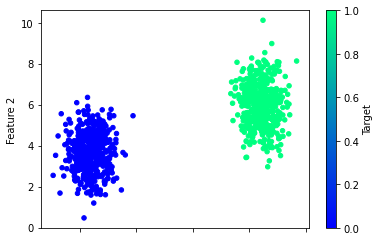

In [7]:
#Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [8]:
#Once we have our dummy data generated, we'll split our data into training and test datasets using Scikit-learn's train_test_split method. 

In [9]:
#Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [11]:
a, b = 3, 5

In [12]:
c = b + 2
c

7

In [13]:
#Creating scaler insance
X_scaler = skl.preprocessing.StandardScaler()

#Fit the scaler
X_scaler.fit(X_train)

#Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
#Finally, we have our data ready for our first neural network model! To create the neural network in our notebook, first we must create our Sequential model.

In [16]:
#Creating the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [17]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [18]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [19]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Now that we have our layers defined, we have to inform the model how it should train using the input data. 
#The process of informing the model how it should learn and train is called compiling the model.

In [22]:
#Depending on the function of the neural network, we'll have to compile the neural network 
#using a specific optimization function and loss metric. The optimization function 
#shapes and molds a neural network model while it is being trained to ensure that it 
#performs to the best of its ability. The loss metric is used by machine learning algorithms 
#to score the performance of the model through each iteration and epoch by evaluating the 
#inaccuracy of a single input.

In [23]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 7ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 3/100
24/24 [==============================] - 0s 10ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 4/100
24/24 [==============================] - 0s 10ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 9/100
24/24 [==============================] - 0s 5ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 10/100
24/24 [==============================] - 0s 12ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 

24/24 [==============================] - 0s 9ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 83/100
24/24 [==============================] - 0s 11ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 84/100
24/24 [==============================] - 0s 6ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 85/100
24/24 [==============================] - 0s 6ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 86/100
24/24 [==============================] - 0s 4ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 7.6096 - accuracy: 0.5067
Epoch 92/100

<AxesSubplot:>

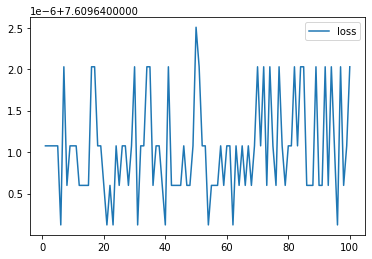

In [25]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

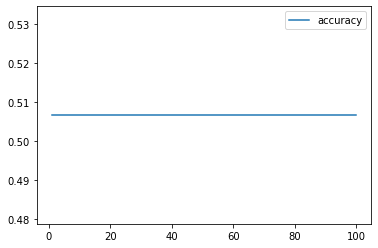

In [26]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 8.0210 - accuracy: 0.4800 - 369ms/epoch - 46ms/step
Loss: 8.020973205566406, Accuracy: 0.47999998927116394


In [28]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

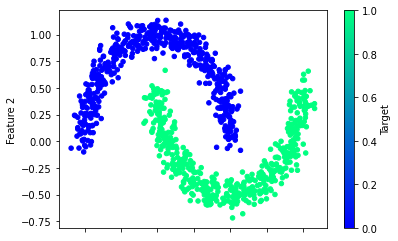

In [29]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [30]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [31]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 5/100
24/24 [==============================] - 0s 12ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 14ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 16ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 10ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 9/100
24/24 [==============================] - 0s 10ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 7ms/step - loss: 7.2394 - accuracy: 0.5307
Epo

24/24 [==============================] - 0s 13ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 83/100
24/24 [==============================] - 0s 11ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 84/100
24/24 [==============================] - 0s 19ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 85/100
24/24 [==============================] - 1s 30ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 86/100
24/24 [==============================] - 0s 21ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 87/100
24/24 [==============================] - 1s 24ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 88/100
24/24 [==============================] - 0s 16ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 89/100
24/24 [==============================] - 0s 19ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 90/100
24/24 [==============================] - 1s 22ms/step - loss: 7.2394 - accuracy: 0.5307
Epoch 91/100
24/24 [==============================] - 1s 24ms/step - loss: 7.2394 - accuracy: 0.5307
Epo